In [26]:
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
df = pd.read_csv('../LC/Lending_Club_Accepted_2014_2018.csv')
df.head()

/var/folders/5p/n3sbx2sd4z9d26_4552pvds00000gn/T/ipykernel_6008/2154752155.py:1: DtypeWarning: Columns (19,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../LC/Lending_Club_Accepted_2014_2018.csv')


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
df_accepted = df.copy()

In [29]:
df_accepted['issue_d'] = pd.to_datetime(df['issue_d'], format="%b-%Y").dt.to_period('M')

In [30]:
good_loan_df = df_accepted[(df_accepted['loan_status'] == 'Fully Paid') | (df_accepted['loan_status'] == 'Current')]

In [31]:
bad_loan_df = df_accepted[(df_accepted['loan_status'] == 'Charged Off')]

In [32]:
good_loan_ts = good_loan_df.groupby('issue_d').count()['id']

In [33]:
bad_loan_ts = bad_loan_df.groupby('issue_d').count()['id']

In [34]:
bad_loan_percentage_ts = bad_loan_ts / (bad_loan_ts + good_loan_ts) * 100
bad_loan_percentage_ts

issue_d
2014-01    15.858890
2014-02    16.558463
2014-03    16.683862
2014-04    17.451640
2014-05    17.423010
2014-06    18.241784
2014-07    17.702203
2014-08    17.789154
2014-09    17.764962
2014-10    18.372045
2014-11    17.707374
2014-12    16.849995
2015-01    18.454065
2015-02    17.730287
2015-03    18.900534
2015-04    18.453731
2015-05    18.510826
2015-06    18.692183
2015-07    18.146440
2015-08    17.762273
2015-09    18.199705
2015-10    16.933099
2015-11    17.533512
2015-12    18.502263
2016-01    17.035212
2016-02    17.223387
2016-03    17.336519
2016-04    17.199777
2016-05    16.949213
2016-06    15.513898
2016-07    16.961535
2016-08    16.368186
2016-09    15.212828
2016-10    13.249260
2016-11    13.626556
2016-12    13.670592
2017-01    11.968590
2017-02    11.553667
2017-03    10.747831
2017-04    10.789301
2017-05    10.534347
2017-06     9.711513
2017-07     9.402759
2017-08     8.388531
2017-09     8.709115
2017-10     7.159291
2017-11     6.152087
2017-

Text(0, 0.5, 'Loan Payment Failure Ratio (% of Loans)')

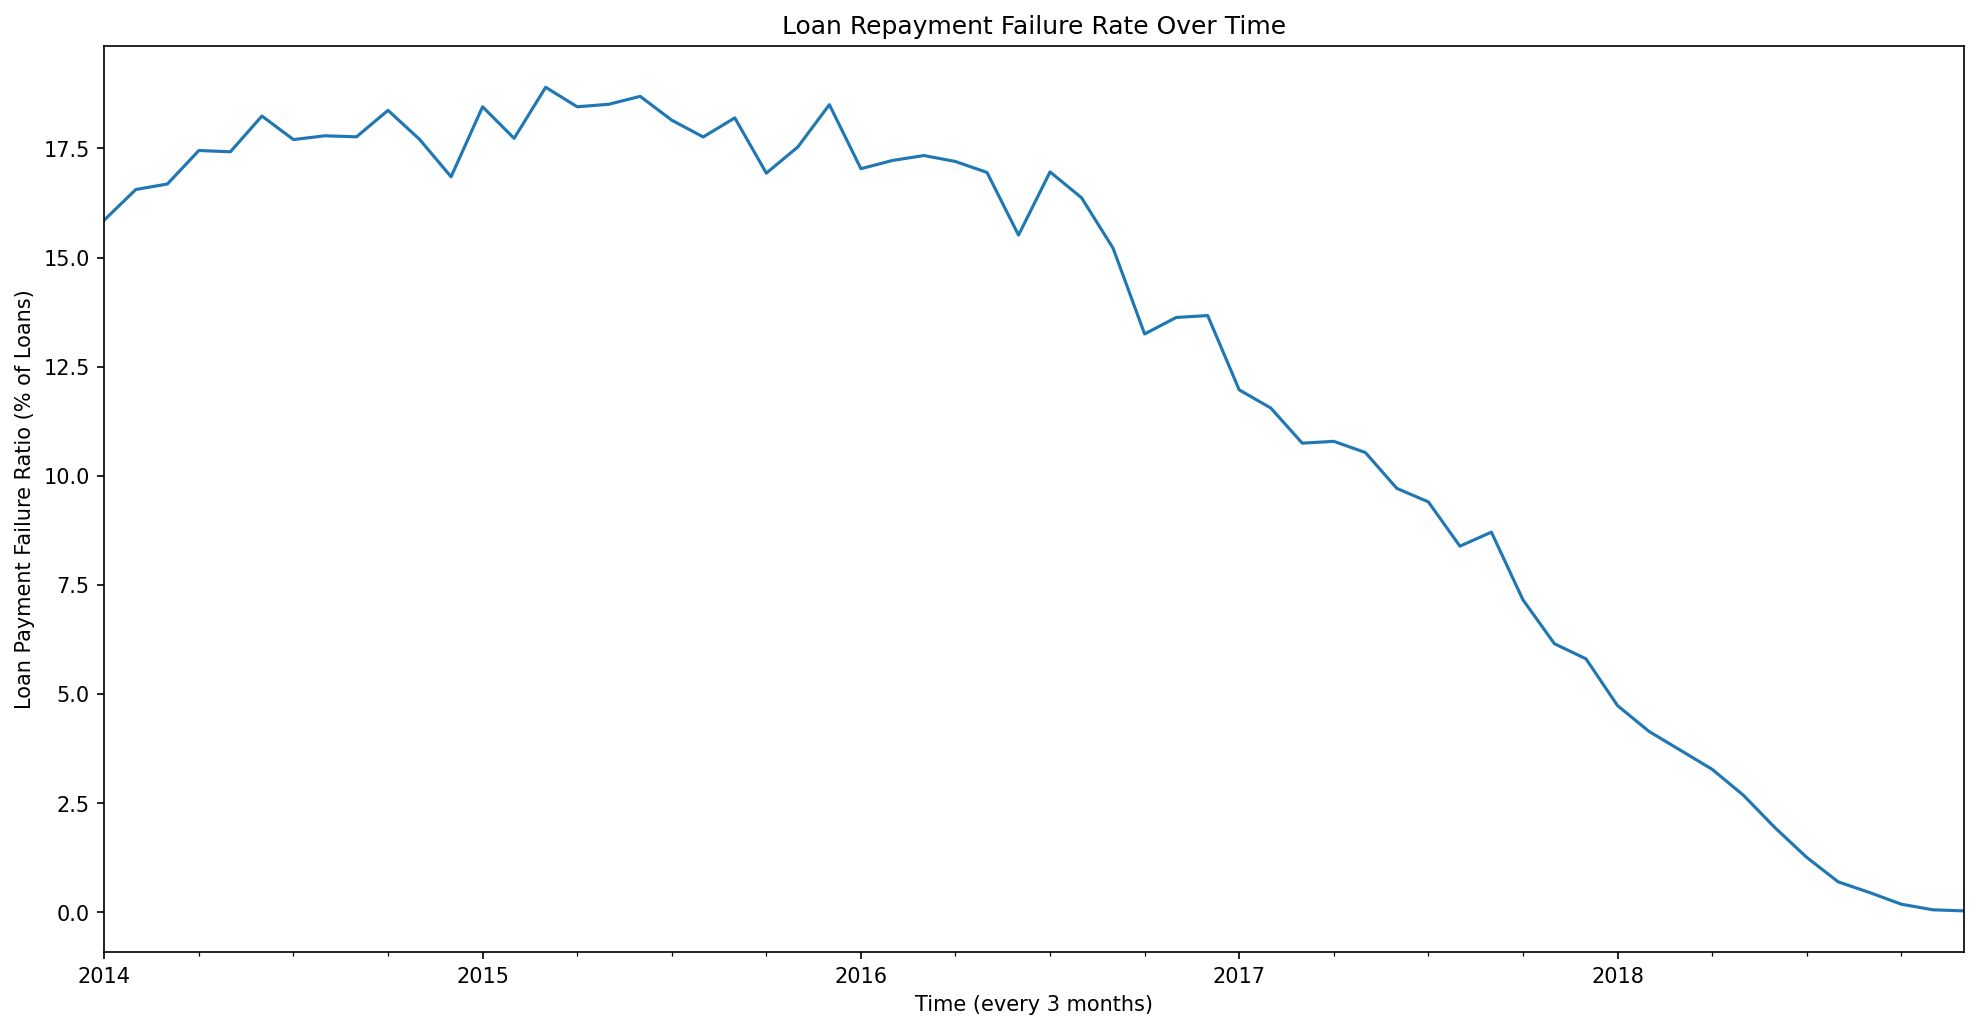

In [35]:
plt.figure(figsize=(16, 8), dpi=150)

bad_loan_percentage_ts.plot()

plt.title('Loan Repayment Failure Rate Over Time')
plt.xlabel('Time (every 3 months)')
plt.ylabel(r'Loan Payment Failure Ratio (% of Loans)')